# Titanic - Machine Learning from Disaster

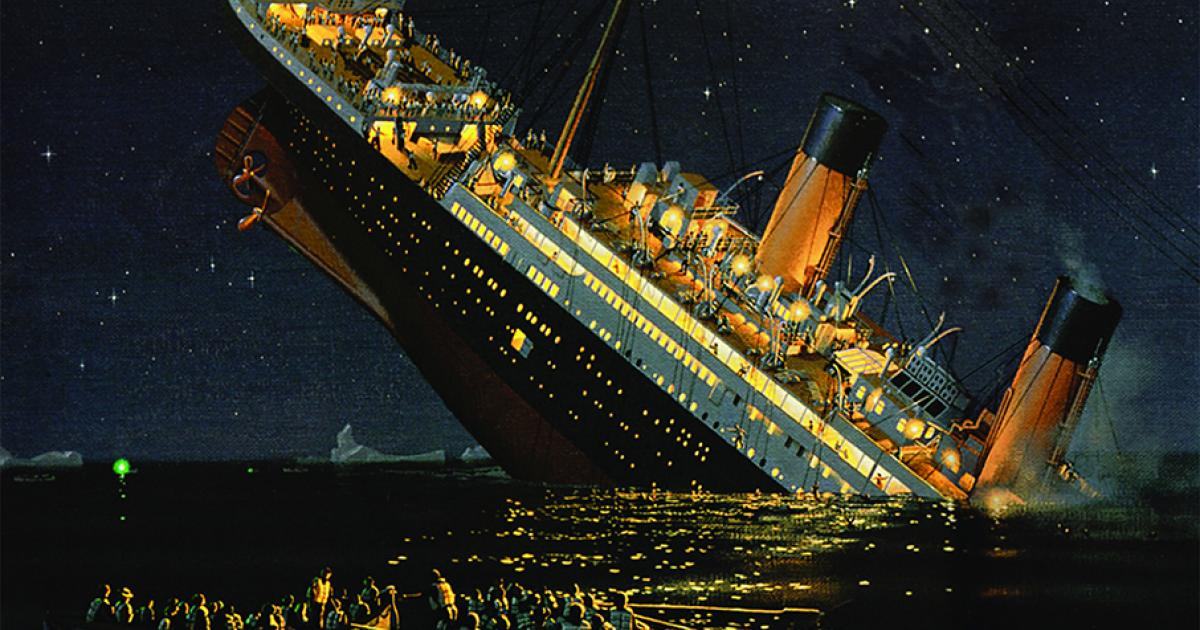


# I. Introduction

# II. Data Preparation

# III. Exploratory Data Analysis

### 1. Loading data

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df=pd.read_csv("/content/drive/MyDrive/DS102/data/train.csv",index_col="PassengerId") #Convert column PassengerId to index
test_df=pd.read_csv("/content/drive/MyDrive/DS102/data/test.csv",index_col="PassengerId")


### 2. Preview data


In [ ]:
#preview data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
# Describe data
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.377990
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.485466
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


* Training data has 891 rows, while Test data has 418
* In training data, columns **Age**, **Embarked** and **Cabin** have missing values
* In test data, columns **Age**, **Fare** and **Cabin** have missing values \
=> Deal with this problem later in **Data Preprocessing** step below.

#### Types of Data
* **Categorical Data**: Pclass, Survived, Embarked, Sibsp, Parch
* **Numerical Data**: Age, Fare

* **Missing values Data**: Age, Fare, Cabin, Embarked

In [ ]:
#Conver to Categorical datatype
cat_col=["Pclass","Survived","SibSp","Parch","Embarked"]
def convert(df,col):
    for col in col:
        df[col]=df[col].astype("category")
convert(train_df,cat_col)
convert(test_df,cat_col)

In [ ]:
# New data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), object(4)
memory usage: 54.2+ KB


### Data Analysis

#### Distribution of numerical data


In [ ]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### Distribution of categorical data


In [ ]:
train_df.describe(include="category")

,Survived,Pclass,SibSp,Parch,Embarked
count,891,891,891,891,889
unique,2,3,7,7,3
top,0,3,0,0,S
freq,549,491,608,678,644


#### Survived

In [ ]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In training data, we have:
* 549 people died
* 342 people survived

In [ ]:
# Proportion of Survived column
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


<Axes: xlabel='Survived', ylabel='count'>

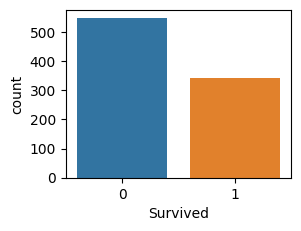

In [ ]:
plt.subplot(2,2,1)
sns.countplot(data=train_df,x='Survived')

* About **61.6%** people on Titanic died, while **38.4%** people survived

#### Sex


In [ ]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In training data, we have:
* 577 males
* 314 females

In [ ]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

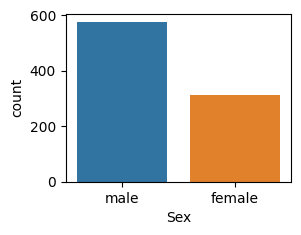

In [ ]:
plt.subplot(2,2,1)
sns.countplot(data=train_df,x='Sex')

* In training data, **64.8%** are male, while **35.2%** others are female

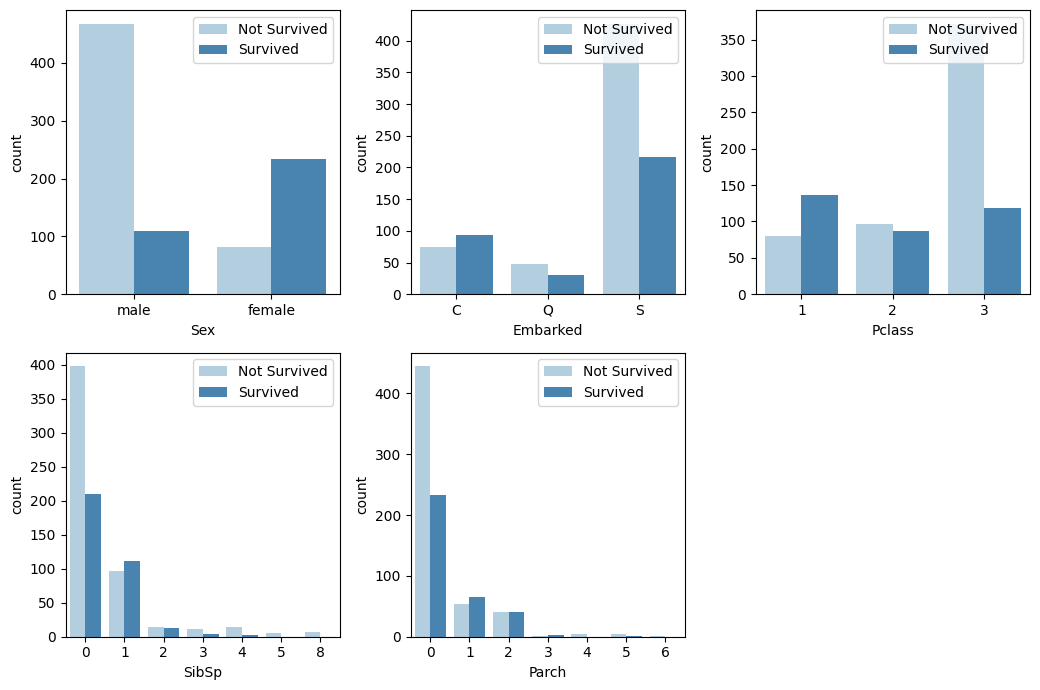

In [ ]:
# Plot survival abilities for categorical data
f_cols=['Sex','Embarked','Pclass','SibSp','Parch']

rows=2
cols=3

# Create subplot for each columns
fig,ax=plt.subplots(rows,cols,figsize=(cols*3.5,rows*3.5))

for r in range (0,rows):
    for c in range (0,cols):
        i = (r*cols) + c
        if i < len(f_cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = f_cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.legend(title='',loc = "upper right", labels = ["Not Survived","Survived"])

ax.flat[-1].set_visible(False) # Delete an empty box, because there're 5 categorical columns, not 6
plt.tight_layout() # Tight layout

After plotting the data, we can see that: \
*

# IV. Data Preprocessing

### Data Wragling and Feature Engineering

In [ ]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
#hàm extract danh hiệu miss, mr đằng trước
import re
def extract_title(name):
    p = re.compile(r",([\w\s].+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name) ) #dat ten cot moi la title, chua danh hieu da extract
train_df['Title'].value_counts()

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: Title, dtype: int64

In [ ]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name) )
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

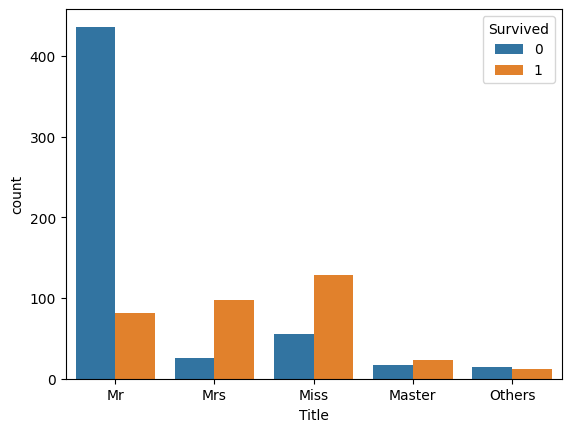

In [ ]:
sns.countplot(data=train_df, x='Title',hue = 'Survived')

Almost Mr die

In [ ]:
#Family size = combine parch and sibsp
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [ ]:
#phan loai gia dinh theo so luong thanh vien
train_df['Family_Cat']=pd.cut(train_df['Family_Size'],bins=[0,1,4,7,20],labels=['Single','Small','Medium','Large'])
#0-1: single; 1-4: small; 4-7: medium; 7-20:large
test_df['Family_Cat']=pd.cut(test_df['Family_Size'],bins=[0,1,4,7,20],labels=['Single','Small','Medium','Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

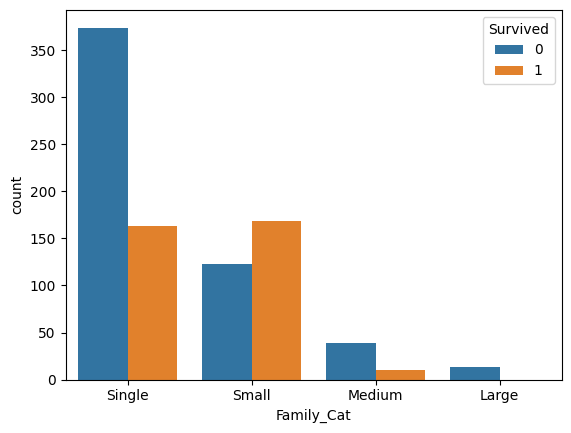

In [ ]:
sns.countplot(data=train_df,x="Family_Cat",hue='Survived')

### Data Wrangling

In [ ]:
num_features=['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
features_cols = num_features + cat_features

In [ ]:
def missing_display(df,features_cols):
    n_rows=df.shape[0]
    for col in features_cols:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")

print(f"Missing data in training set: {missing_display(train_df,features_cols)}")
print(f"Missing data in test set: {missing_display(test_df,features_cols)}")


Age has 19.87% missing values
Embarked has 0.22% missing values
Missing data in training set: None
Age has 20.57% missing values
Fare has 0.24% missing values
Missing data in test set: None


#### Filling missing value


In [ ]:
missing_display(train_df,features_cols)

Age has 19.87% missing values
Embarked has 0.22% missing values


In [ ]:
missing_display(test_df,features_cols)

Age has 20.57% missing values
Fare has 0.24% missing values


- Split training data to X and y \
- X: All feature columns \
- y: Column Survived


In [ ]:
X = train_df[features_cols]
y = train_df['Survived']

In [ ]:
X_test = test_df[features_cols]
y_test = test_df['Survived']

In [ ]:
# preprocess pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [ ]:
preprocessed_X_df = pd.DataFrame(preprocessor.transform(X), columns=X.columns)

preprocessed_X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=X_test.columns)

In [ ]:
preprocessed_X_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,-0.565736,-0.502445,male,3,S,Mr,Small
1,0.663861,0.786845,female,1,C,Mrs,Small
2,-0.258337,-0.488854,female,3,S,Miss,Single
3,0.433312,0.42073,female,1,S,Mrs,Small
4,0.433312,-0.486337,male,3,S,Mr,Single


In [ ]:
preprocessed_X_test_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,0.394887,-0.490783,male,3,Q,Mr,Single
1,1.35551,-0.507479,female,3,S,Mrs,Small
2,2.508257,-0.453367,male,2,Q,Mr,Single
3,-0.181487,-0.474005,male,3,S,Mr,Single
4,-0.565736,-0.401017,female,3,S,Mrs,Small


### Label Encoder for Categorical Feature

In [ ]:
cat_features

['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [ ]:
preprocessed_X_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       124
Master     40
Others     27
Name: Title, dtype: int64

In [ ]:
preprocessed_X_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
preprocessed_X_df['Family_Cat'].value_counts()

Single    537
Small     292
Medium     49
Large      13
Name: Family_Cat, dtype: int64

In [ ]:
oh_enc = OneHotEncoder(handle_unknown='ignore')
pd.DataFrame(oh_enc.fit_transform(preprocessed_X_df[['Title']]).toarray()).head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [ ]:
le_enc = LabelEncoder()

pd.DataFrame(le_enc.fit_transform(preprocessed_X_df['Title'])).head()

,0
0,2
1,3
2,1
3,3
4,2


In [ ]:
print(le_enc.classes_)

['Master' 'Miss' 'Mr' 'Mrs' 'Others']


In [ ]:


for cat_col in ['Sex', 'Embarked', 'Title', 'Family_Cat']:
    le_enc = LabelEncoder()
    preprocessed_X_df[cat_col] = le_enc.fit_transform(preprocessed_X_df[cat_col])
    preprocessed_X_test_df[cat_col] = le_enc.transform(preprocessed_X_test_df[cat_col])

preprocessed_X_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,-0.565736,-0.502445,1,3,2,2,3
1,0.663861,0.786845,0,1,0,3,3
2,-0.258337,-0.488854,0,3,2,1,2
3,0.433312,0.42073,0,1,2,3,3
4,0.433312,-0.486337,1,3,2,2,2


In [ ]:
preprocessed_X_test_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,0.394887,-0.490783,1,3,1,2,2
1,1.35551,-0.507479,0,3,2,3,3
2,2.508257,-0.453367,1,2,1,2,2
3,-0.181487,-0.474005,1,3,2,2,2
4,-0.565736,-0.401017,0,3,2,3,3


In [ ]:
def cast_types(df):
    df['Age'] = df['Age'].astype(float)
    df['Fare'] = df['Fare'].astype(float)
    df['Pclass'] = df['Pclass'].astype(int)
    return df

In [ ]:
preprocessed_X_df = cast_types(preprocessed_X_df)
preprocessed_X_test_df = cast_types(preprocessed_X_test_df)

In [ ]:
X = preprocessor.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(preprocessed_X_df, y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 7), (179, 7))

In [ ]:
# Pre-Processing
from sklearn.preprocessing import PolynomialFeatures

# Model Selection
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV


# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier,\
 GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn import tree
from xgboost import XGBClassifier

from sklearn import metrics

In [ ]:
seed = 2023
models = [
  LogisticRegression(solver='liblinear',penalty='l2',max_iter=10000),
  LinearSVC(random_state=seed,max_iter=120000),
  SVC(random_state=seed),
  KNeighborsClassifier(metric='minkowski', p=2),
  DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,random_state=seed),
  RandomForestClassifier(random_state=seed),
  ExtraTreesClassifier(),
  AdaBoostClassifier(),
  XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [ ]:
from sklearn.model_selection import StratifiedKFold

def baseline_result(models, X, y, metrics, cv=15, plot_results=True):
  kfold = StratifiedKFold(cv,shuffle=True,random_state=seed)
  entries=[]
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model,X_train,y_train,scoring=metrics,cv=kfold)
    for kfold_idx,score in enumerate(scores):
      entries.append((model_name,kfold_idx,score))

  res_df = pd.DataFrame(entries,columns = ['Model Name','Fold Index','Accuracy Score'])
  results = res_df.groupby('Model Name')['Accuracy Score'].mean().reset_index()
  results.columns = ['Model Name', 'Mean']

  results.sort_values(by=['Mean'],ascending = False, inplace = True )

  return results
result = baseline_result(models, X,y, metrics='accuracy', cv=15, plot_results=True)
print(result)

               Model Name      Mean
8           XGBClassifier  0.834368
6  RandomForestClassifier  0.827305
1  DecisionTreeClassifier  0.825798
7                     SVC  0.818794
5      LogisticRegression  0.803517
2    ExtraTreesClassifier  0.802128
0      AdaBoostClassifier  0.799291
4               LinearSVC  0.793706
3    KNeighborsClassifier  0.793469


Text(0, 0.5, 'Algorithm')

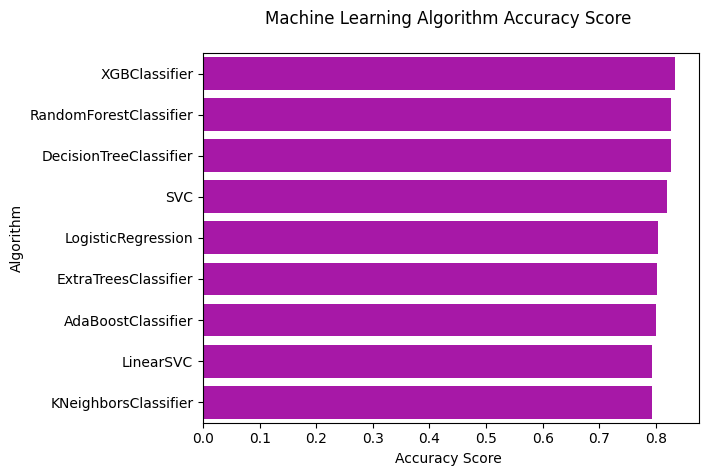

In [ ]:
sns.barplot(x='Mean', y = 'Model Name', data = result, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score ')
plt.ylabel('Algorithm')

In [ ]:
import time, datetime
def train_model(X, y, model, kfold, params, n_iter=50):
    print("\n")
    print(f"{model.__class__.__name__}: Training Started")
    start_time = time.time()
    clf = RandomizedSearchCV(model,
                             param_distributions=params,
                             cv=kfold,
                             n_iter=n_iter,
                             n_jobs=-1,
                             verbose=5,
                             random_state = 5005,
                            error_score='raise')
    clf.fit(X, y)

    #Best Params
    best_score, best_params = round(clf.best_score_,2), clf.best_params_

    print('Best Score: ', best_score)
    print('Best Hyperparameters: ', best_params)
    print(f"Total Time: {datetime.timedelta(seconds=(time.time() - start_time)).total_seconds():.2f} s\n")
    return best_score, best_params, clf.best_estimator_

In [ ]:
import tqdm
model_list = [
    (RandomForestClassifier(), {
        'n_estimators': [5,10,15,20,50,100],
        'max_depth': [5,10,15,20],
        'min_samples_split': [5,10,15,20],
        'min_samples_leaf': [5,10,15,20],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }),
      (SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [1, 2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    }),
    (XGBClassifier(), {
        'n_estimators': [50,100,150,200],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [1,2,3,5,7,8,10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
        'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100]
    })
]
kfolds = [5,10]
final_scores, best_models, model_params = {}, {}, {}

for model in tqdm.tqdm(model_list):
    print("================")
    print(f"Working with {model.__class__.__name__}")
    print("================")
    for kfold in kfolds:
      model_name = model[0].__class__.__name__
      score, best_params, best_model = train_model(preprocessed_X_df, y, model[0], kfold, model[1])
      final_scores[model_name] = score
      best_models[model_name] = best_model
      model_params[model_name] = best_params


#for model, param_dist in model_list:
 # print("===============================")
  #print(f"Working with {model.__class__.__name__} ")
  #print("===============================")
  #for kfold in kfolds:
   # train_model(X_train, y_train, model, kfold, param_dist)

  0%|          | 0/3 [00:00<?, ?it/s]

Working with tuple


RandomForestClassifier: Training Started
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score:  0.83
Best Hyperparameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
Total Time: 10.87 s



RandomForestClassifier: Training Started
Fitting 10 folds for each of 50 candidates, totalling 500 fits


 33%|███▎      | 1/3 [00:33<01:06, 33.45s/it]

Best Score:  0.84
Best Hyperparameters:  {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
Total Time: 22.58 s

Working with tuple


SVC: Training Started
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score:  0.83
Best Hyperparameters:  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'C': 1}
Total Time: 117.33 s



SVC: Training Started
Fitting 10 folds for each of 50 candidates, totalling 500 fits


 67%|██████▋   | 2/3 [07:31<04:19, 259.58s/it]

Best Score:  0.83
Best Hyperparameters:  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'C': 1}
Total Time: 300.53 s

Working with tuple


XGBClassifier: Training Started
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score:  0.85
Best Hyperparameters:  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.9}
Total Time: 7.18 s



XGBClassifier: Training Started
Fitting 10 folds for each of 50 candidates, totalling 500 fits


100%|██████████| 3/3 [07:55<00:00, 158.57s/it]

Best Score:  0.85
Best Hyperparameters:  {'subsample': 1.0, 'reg_lambda': 1e-05, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Total Time: 17.22 s



In [ ]:
final_scores, best_models, model_params

({'RandomForestClassifier': 0.84, 'SVC': 0.83, 'XGBClassifier': 0.85},
 {'RandomForestClassifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                         min_samples_leaf=5, min_samples_split=15,
                         n_estimators=50),
  'SVC': SVC(C=1, degree=1, gamma='auto'),
  'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=1.0, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=0, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=2, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                m

In [ ]:
forest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                         min_samples_leaf=10, min_samples_split=10,
                         n_estimators=10)
forest.fit(X_train,y_train)
forest.score(preprocessed_X_test_df,y_test)

0.7655502392344498

In [ ]:
y_forest = forest.predict(preprocessed_X_test_df)
y_forest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

forest_report = classification_report(y_test, y_forest)


print("Random Forest Classification Report:\n", forest_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       260
           1       0.71      0.65      0.68       158

    accuracy                           0.77       418
   macro avg       0.75      0.74      0.75       418
weighted avg       0.76      0.77      0.76       418



In [ ]:
forest_cf = pd.DataFrame(confusion_matrix(y_test,y_forest),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )
print(f"Confusion Matrix của Random Forest:\n",forest_cf)


Confusion Matrix của Random Forest:
               Predicted Not-Survived  Predicted Survived
Not-Survived                     218                  42
Survived                          56                 102


In [ ]:
sv = SVC(kernel= 'rbf', gamma= 'auto', degree= 1, C= 1)
sv.fit(X_train,y_train)
sv.score(preprocessed_X_test_df,y_test)

0.7727272727272727

In [ ]:
y_svc= sv.predict(preprocessed_X_test_df)

svc_report = classification_report(y_test, y_svc)


print("Support Vector Machine Report:\n", svc_report)

Support Vector Machine Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       260
           1       0.69      0.72      0.70       158

    accuracy                           0.77       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.77      0.77      0.77       418



In [ ]:
xgb = XGBClassifier(subsample= 0.8, reg_lambda= 1, reg_alpha= 0, n_estimators= 200, max_depth= 5, learning_rate= 0.01, gamma= 0, colsample_bytree= 0.9)

In [ ]:
xgb.fit(X_train,y_train)
xgb.score(preprocessed_X_test_df,y_test)

0.7727272727272727

In [ ]:
y_xgb= xgb.predict(preprocessed_X_test_df)
xgb_report = classification_report(y_test, y_xgb)

print("XGBoost Report:\n", xgb_report)

XGBoost Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       260
           1       0.73      0.63      0.68       158

    accuracy                           0.77       418
   macro avg       0.76      0.75      0.75       418
weighted avg       0.77      0.77      0.77       418

